<0> github 에서 파일 받아 구글 드라이브에 저장하기 


1. 구글 드라이브에 (예)DL_from_Scratch_study_code폴더 만들어서  deep-learning-from-scratch-master 저장
     https://github.com/WegraLee/deep-learning-from-scratch 
2. dataset의 mnist.py파일 ch03으로 복사하기

3. 사용할 손글씨 이미지 ch03(구글드라이브)에 저장
    
    ! 이미지 조건 (28*28 사이즈 / 검은바탕 흰글씨)


      











<1> 구글 드라이브와 연동하기
1. 아래 코드 실행
2. 출력 된 링크 타고 들어가서 로그인 
3. 인증 코드 복사 붙여넣기

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')


<2> 디렉토리 연결 내용 확인하기

In [ ]:
!ls

<3> 디렉토리 변경

  "DL_from_Scratch_study_code" 폴더에 깃허브 파일 저장 후 사용

> !! 이미 마운트 된 상태에서 end point 오류 시 "런타임> 런타임 초기화" 후 다시 실행해보기 




In [ ]:
import os
os.chdir('drive/My Drive/DL_from_Scratch_study_code/deep-learning-from-scratch-master')

<4> 실행할 코드 

*   이미지는 ch03 폴더 안에 넣어두기



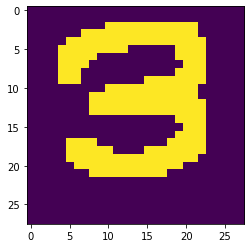

추정된 숫자 >>3


In [ ]:
# coding: utf-8
import sys
import numpy as np
import pickle

from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

from PIL import Image 
import matplotlib.pyplot as plt

def get_data():
    image_path = "./ch03/num.png"

    # 이미지를 256단계 흑백 이미지로 불러오기
    img = Image.open(image_path).convert("L")

    #로드한 이미지 확인
    plt.imshow(img)
    plt.show()

    # flatten
    img = np.resize(img, (1, 784))
    #normalize
    im2arr = np.array(img) / 255

    # 추정만 하고 정확도 따지지 않으므로, x_test만 반환
    x_test = im2arr
    return x_test


def init_network():
  #경로 설정
    with open("./ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
    
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x = get_data()
network = init_network()
y = predict(network, x)
p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
print("추정된 숫자 >>"+str(p))
